In [1]:
#load in our libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import os

In [2]:
#load in our data set
cancer = pd.read_csv("./dataset/wdbc.csv")
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
cancer["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [4]:
cancer["diagnosis"] = cancer["diagnosis"].replace({ "M": "Malignant" , "B" : "Benign"})

In [5]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
cancer["diagnosis"].value_counts(normalize = True)

diagnosis
Benign       0.627417
Malignant    0.372583
Name: proportion, dtype: float64

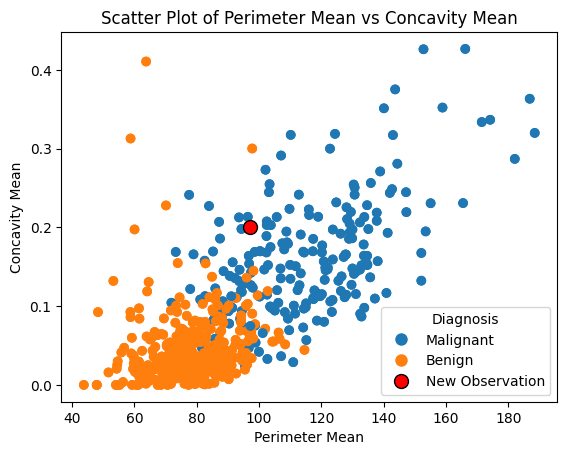

In [12]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Plot
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))


# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add labels and legend
#plt.xlabel('Perimeter Mean')
#plt.ylabel('Concavity Mean')
#plt.title('Scatter Plot of Perimeter Mean vs "Concavity Mean"')
#plt.legend(handles=handles, title='Diagnosis')
#plt.show()

# Plot existing data
plt.scatter(cancer["perimeter_mean"], cancer['concavity_mean'], 
            color=cancer["diagnosis"].map(color_map))

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markersize=10, markerfacecolor=color_map[label])
           for label in labels]

# Add new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20}
plt.scatter(new_observation['perimeter_mean'], new_observation['concavity_mean'],
            color='red', edgecolor='black', s=100, label='New Observation')

            
plt.xlabel('Perimeter Mean')
plt.ylabel('Concavity Mean')
plt.title('Scatter Plot of Perimeter Mean vs Concavity Mean')
plt.legend(handles=handles + [plt.Line2D([0], [0], marker='o', color='w', 
                                          markerfacecolor='red', markeredgecolor='black', 
                                          markersize=10, label='New Observation')], 
           title='Diagnosis')
plt.show()

In [14]:
#perimeter mean = 97
#concavity mean = 0.2

new_obs_Perimeter = 97
new_obs_Concavity = 0.2

cancer["dist_from_new"] = ((cancer["perimeter_mean"] - new_obs_Perimeter) **2 + 
(cancer["concavity_mean"] - new_obs_Concavity) **2 ) ** (1/2)

In [15]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,dist_from_new
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,25.800194
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,35.900178
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,33.000000
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,19.420044
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,38.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,45.000021
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,34.200046
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,11.300511
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,43.100266


In [16]:
cancer.nsmallest(5, "dist_from_new")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,dist_from_new
291,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,26.19,109.1,809.8,0.1313,0.3030,0.1804,0.1489,0.2962,0.08472,0.143765
138,868826,Malignant,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,...,21.43,121.4,971.4,0.1411,0.2164,0.3355,0.1667,0.3414,0.07147,0.156924
15,84799002,Malignant,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,0.272403
514,91594602,Malignant,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,...,28.06,113.8,967.0,0.1246,0.2101,0.2866,0.1120,0.2282,0.06954,0.288548
54,857438,Malignant,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,...,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873,0.298910


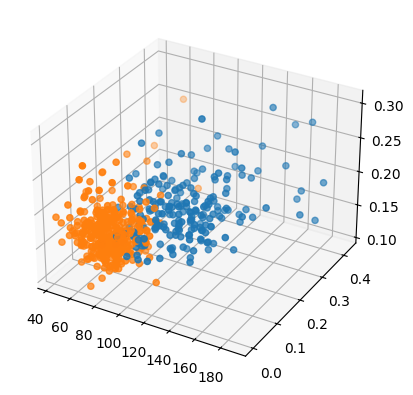

In [20]:
# Create mapping between values and colors
labels = cancer["diagnosis"].unique().tolist()
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {l: colors[i % len(colors)] for i, l in enumerate(labels)}

# Create a 3D plot
ax = plt.axes(projection="3d")

# Plot data points with color corresponding to diagnosis
sc = ax.scatter3D(cancer['perimeter_mean'], cancer['concavity_mean'], cancer['symmetry_mean'],c=cancer['diagnosis'].map(color_map), marker='o')

# Define the new observation
new_observation = {'perimeter_mean': 97, 'concavity_mean': 0.20, 'symmetry_mean': 0.22}

<module 'matplotlib.pyplot' from '/Users/hemantwalia/Desktop/dsi_lcr/LCR/lcr-env/lib/python3.11/site-packages/matplotlib/pyplot.py'>

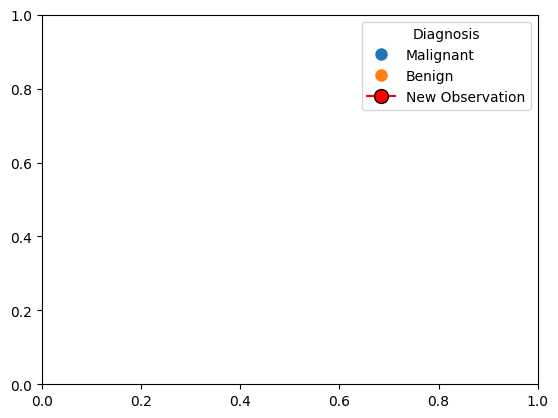

In [21]:
# Plot the new observation
ax.scatter3D(new_observation['perimeter_mean'], new_observation['concavity_mean'],
new_observation['symmetry_mean'], color='red', edgecolor='black',
s=100, marker='o', label='New Observation')

# Add axis labels
ax.set_xlabel('Perimeter Mean')
ax.set_ylabel('Concavity Mean')
ax.set_zlabel('Symmetry Mean')
ax.set_title('3D Scatter Plot of Perimeter Mean, Concavity Mean, and Symmetry Mean')

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
markersize=10, markerfacecolor=color_map[label])
for label in labels]

# Add custom legend for new observation
handles.append(plt.Line2D([0], [0], marker='o', color='red', label='New Observation',
markersize=10, markeredgecolor='black'))

# Add legend
plt.legend(handles=handles, title='Diagnosis')

# Show plot
plt

In [18]:
#we want to inclue a third feature
new_obs_Perimeter = 97
new_obs_Concavity = 0.20
new_obs_Symmetry = 0.22


cancer["dist_from_new"] = ((cancer["perimeter_mean"] - new_obs_Perimeter) **2 + 
(cancer["concavity_mean"] - new_obs_Concavity) **2 + (cancer["symmetry_mean"] - new_obs_Symmetry) **2) ** (1/2)



In [19]:
cancer.nsmallest(5, "dist_from_new")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,dist_from_new
291,8915,Benign,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,...,26.19,109.1,809.8,0.1313,0.3030,0.1804,0.1489,0.2962,0.08472,0.147305
138,868826,Malignant,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,...,21.43,121.4,971.4,0.1411,0.2164,0.3355,0.1667,0.3414,0.07147,0.158795
15,84799002,Malignant,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,0.272597
514,91594602,Malignant,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.04335,...,28.06,113.8,967.0,0.1246,0.2101,0.2866,0.1120,0.2282,0.06954,0.295539
54,857438,Malignant,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.03334,...,31.69,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873,0.304562


In [22]:
from sklearn import set_config
#output data frames instead of arrays
set_config(transform_output = "pandas")

In [23]:
from sklearn.neighbors import KNeighborsClassifier


In [24]:
cancer_train = cancer[["diagnosis","perimeter_mean","concavity_mean"]]
cancer_train

,diagnosis,perimeter_mean,concavity_mean
0,Malignant,122.80,0.30010
1,Malignant,132.90,0.08690
2,Malignant,130.00,0.19740
3,Malignant,77.58,0.24140
4,Malignant,135.10,0.19800
...,...,...,...
564,Malignant,142.00,0.24390
565,Malignant,131.20,0.14400
566,Malignant,108.30,0.09251
567,Malignant,140.10,0.35140


In [28]:
# Step 1. Initialize our model
knn= KNeighborsClassifier(n_neighbors=5)

In [32]:
#Step 2. Define our predictors and response variable
x = cancer_train[["perimeter_mean","concavity_mean"]]
y = cancer_train["diagnosis"]

In [33]:
#Step 3. Fit our model to our data
knn.fit(x,y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
new_obs = pd.DataFrame({"perimeter_mean":[97], "concavity_mean":[0.2]})
new_obs

,perimeter_mean,concavity_mean
0,97,0.2


In [35]:
#Step 4. Predict our new obs
knn.predict(new_obs)

array(['Malignant'], dtype=object)